In [10]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [11]:
data = pd.read_csv("C:\\Users\\Dell\\Downloads\\archive\\supermarket.csv")
data

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales
0,1,CA-2017-152156,08/11/2017,11/11/2017,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420.0,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600
1,2,CA-2017-152156,08/11/2017,11/11/2017,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420.0,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400
2,3,CA-2017-138688,12/06/2017,16/06/2017,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,California,90036.0,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200
3,4,US-2016-108966,11/10/2016,18/10/2016,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311.0,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775
4,5,US-2016-108966,11/10/2016,18/10/2016,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311.0,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9795,9796,CA-2017-125920,21/05/2017,28/05/2017,Standard Class,SH-19975,Sally Hughsby,Corporate,United States,Chicago,Illinois,60610.0,Central,OFF-BI-10003429,Office Supplies,Binders,"Cardinal HOLDit! Binder Insert Strips,Extra St...",3.7980
9796,9797,CA-2016-128608,12/01/2016,17/01/2016,Standard Class,CS-12490,Cindy Schnelling,Corporate,United States,Toledo,Ohio,43615.0,East,OFF-AR-10001374,Office Supplies,Art,"BIC Brite Liner Highlighters, Chisel Tip",10.3680
9797,9798,CA-2016-128608,12/01/2016,17/01/2016,Standard Class,CS-12490,Cindy Schnelling,Corporate,United States,Toledo,Ohio,43615.0,East,TEC-PH-10004977,Technology,Phones,GE 30524EE4,235.1880
9798,9799,CA-2016-128608,12/01/2016,17/01/2016,Standard Class,CS-12490,Cindy Schnelling,Corporate,United States,Toledo,Ohio,43615.0,East,TEC-PH-10000912,Technology,Phones,Anker 24W Portable Micro USB Car Charger,26.3760


In [14]:
data["Order Date"] = pd.to_datetime(data["Order Date"], dayfirst=True)

data["Order Date"]

0      2017-11-08
1      2017-11-08
2      2017-06-12
3      2016-10-11
4      2016-10-11
          ...    
9795   2017-05-21
9796   2016-01-12
9797   2016-01-12
9798   2016-01-12
9799   2016-01-12
Name: Order Date, Length: 9800, dtype: datetime64[ns]

In [16]:
data["different_day_of_week"] = data["Order Date"].dt.weekday
data["different_day_of_week"]


0       2
1       2
2       0
3       1
4       1
       ..
9795    6
9796    1
9797    1
9798    1
9799    1
Name: different_day_of_week, Length: 9800, dtype: int32

In [17]:
data["order_month"] = data["Order Date"].dt.month
data["order_month"]


0       11
1       11
2        6
3       10
4       10
        ..
9795     5
9796     1
9797     1
9798     1
9799     1
Name: order_month, Length: 9800, dtype: int32

In [18]:
data["order_year"] = data["Order Date"].dt.year
data["order_year"]

0       2017
1       2017
2       2017
3       2016
4       2016
        ... 
9795    2017
9796    2016
9797    2016
9798    2016
9799    2016
Name: order_year, Length: 9800, dtype: int32

In [19]:
a = data.groupby("different_day_of_week")["Sales"].sum().reset_index()
a


,different_day_of_week,Sales
0,0,348791.5516
1,1,420535.9243
2,2,315888.9722
3,3,142839.2402
4,4,234710.8402
5,5,420901.4763
6,6,377868.7779


<BarContainer object of 7 artists>

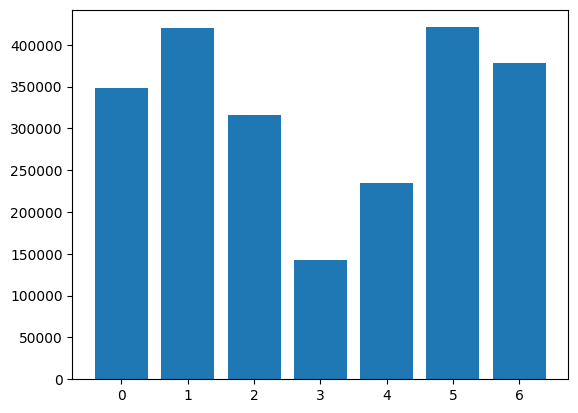

In [20]:
plt.bar(a["different_day_of_week"], a["Sales"])

([<matplotlib.axis.XTick at 0x1db1cf67520>,
 [Text(2015, 0, '2015'),
  Text(2016, 0, '2016'),
  Text(2017, 0, '2017'),
  Text(2018, 0, '2018')])

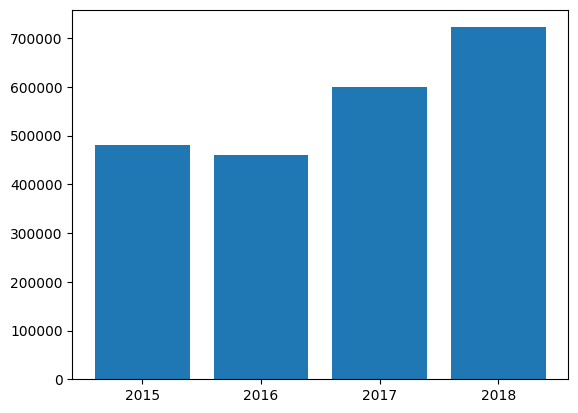

In [21]:
b = data.groupby('order_year')["Sales"].sum().reset_index()
b
plt.bar(b["order_year"], b["Sales"])
plt.xticks(b["order_year"])


In [22]:
c =data.groupby(["order_year",'order_month'])["Sales"].sum().reset_index()
c.sort_values("Sales", ascending=False)


,order_year,order_month,Sales
46,2018,11,117938.1550
35,2017,12,95739.1210
44,2018,9,86152.8880
47,2018,12,83030.3888
8,2015,9,81623.5268
34,2017,11,79066.4958
10,2015,11,77907.6607
45,2018,10,77448.1312
22,2016,11,75249.3995
23,2016,12,74543.6012


In [24]:
c =data.groupby(["order_year",'order_month'])["Order ID"].nunique().reset_index()
c


,order_year,order_month,Order ID
0,2015,1,30
1,2015,2,28
2,2015,3,69
3,2015,4,63
4,2015,5,68
5,2015,6,64
6,2015,7,64
7,2015,8,70
8,2015,9,129
9,2015,10,78


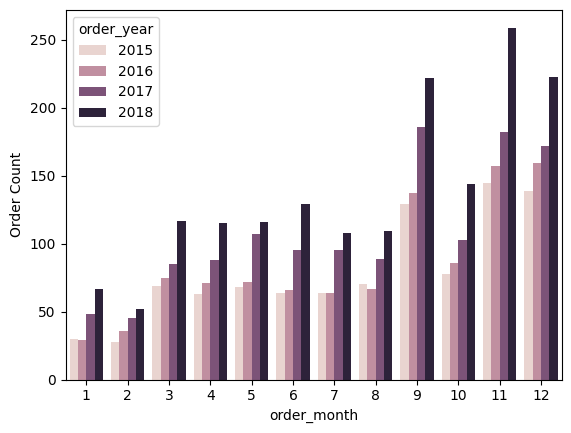

In [25]:
sns.barplot(data= c , x="order_month", y="Order ID", hue="order_year")
plt.ylabel("Order Count")
plt.show()

In [26]:
data["Ship Date"] = pd.to_datetime(data["Ship Date"], dayfirst=True)
data.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,different_day_of_week,order_month,order_year
0,1,CA-2017-152156,2017-11-08,2017-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420.0,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,11,2017
1,2,CA-2017-152156,2017-11-08,2017-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420.0,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,2,11,2017
2,3,CA-2017-138688,2017-06-12,2017-06-16,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,...,90036.0,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,0,6,2017
3,4,US-2016-108966,2016-10-11,2016-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311.0,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,1,10,2016
4,5,US-2016-108966,2016-10-11,2016-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311.0,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,1,10,2016


In [28]:
data["Shipping Duration"] = (data["Ship Date"] - data["Order Date"]).astype("str").str.split(expand=True)[0]
data["Shipping Duration"]

0       3
1       3
2       4
3       7
4       7
       ..
9795    7
9796    5
9797    5
9798    5
9799    5
Name: Shipping Duration, Length: 9800, dtype: object

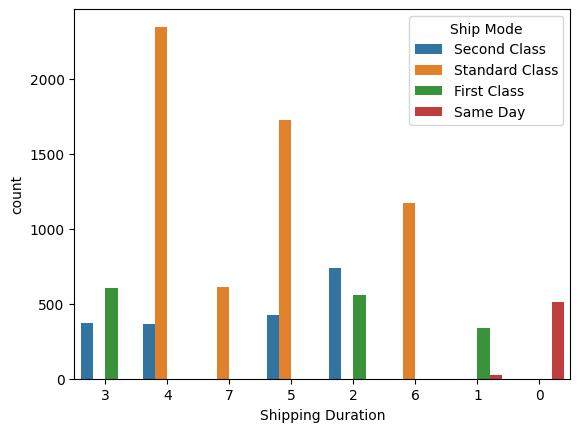

In [29]:
sns.countplot(data = data, x = "Shipping Duration", hue="Ship Mode")
data["shipping_duration_int"] = data["Shipping Duration"].astype("int")

In [30]:
data.groupby('Region')["shipping_duration_int"].mean()

Region
Central    4.065876
East       3.910233
South      3.961202
West       3.930255
Name: shipping_duration_int, dtype: float64